# Visualize a_kj

In [85]:
import numpy as np


In [8]:
def generate_a_kj(len_premise, len_hypothesis):
    """
    debug purpose generation. 
    """
    a_kj = np.random.rand(1, len_hypothesis, len_premise)
    for i in range(a_kj.shape[1]): # make the sum over 3 dimension is 1. This is output of softmax.
        a_kj[0, i, :] = a_kj[0, i, :] / np.sum(a_kj[0, i, :])
        
    return a_kj

premise_tokens = "I am hungry now NULL".split(" ")
hypothesis_tokens = "I want to eat something now".split(" ")

a_kj = generate_a_kj(len(premise_tokens), len(hypothesis_tokens)) # [batch_size, timestep, length_of_premise]

# Assume batch_size is 1
print(a_kj)


[[[ 0.28608917  0.01047886  0.11411725  0.38979238  0.19952233]
  [ 0.23151208  0.16018462  0.20582266  0.19809723  0.20438341]
  [ 0.22897231  0.31821282  0.20926581  0.19401342  0.04953564]
  [ 0.08542506  0.22448726  0.17670935  0.23036137  0.28301696]
  [ 0.05370158  0.0111107   0.1602793   0.39931464  0.37559378]
  [ 0.08907094  0.64367337  0.09784334  0.03193569  0.13747666]]]


In [116]:
# Load the actual values from model inference

import pickle 
data_out_filename = "../forward_data_mLSTM.pkl"
batch_data = pickle.load(open(data_out_filename, "rb"))
# print(batch_data)
print(len(batch_data['x']))
num_batch = len(batch_data['x'])
print(len(batch_data['x'][0]))
batch_size = len(batch_data['x'][0])

84
120


In [117]:
# select single data point
def get_datapoint(batch_data, batch_idx, point_idx):
    premise_tokens = batch_data['x'][batch_idx][point_idx]
    premise_tokens.append('NULL')
    hypothesis_tokens = batch_data['y'][batch_idx][point_idx]
    a_kj_ph = batch_data['alignment_att_ph'][batch_idx][point_idx] # [hypothesis_size, premise_size]
    # print(a_kj_ph.shape)
    # print("premise_length:", len(premise_tokens))
    # print("hypothesis_length:", len(hypothesis_tokens))
    
    eps = 0.0001
    assert(np.sum(a_kj_ph[0, :]) < 1+eps and np.sum(a_kj_ph[0, :]) > 1-eps) # should be 1. sanity check
    a_kj_ph = a_kj_ph[:len(hypothesis_tokens), :len(premise_tokens)]
    assert(np.sum(a_kj_ph[0, :]) < 1+eps and np.sum(a_kj_ph[0, :]) > 1-eps) # should be 1. sanity check
    
    logits = batch_data['logits'][batch_idx][point_idx]
    logits_per_h = batch_data['logits_per_h'][batch_idx][point_idx]
    logits_per_h = logits_per_h[:len(hypothesis_tokens), :]
    z = batch_data['z'][batch_idx][point_idx]
    return premise_tokens, hypothesis_tokens, a_kj_ph, logits, z, logits_per_h




True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


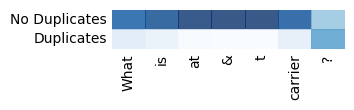

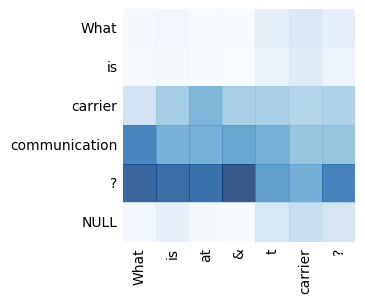

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


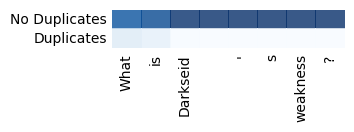

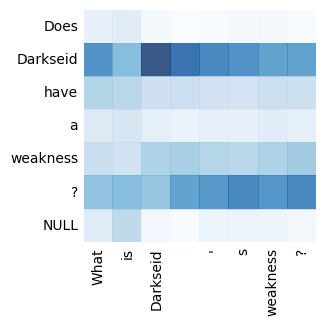

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


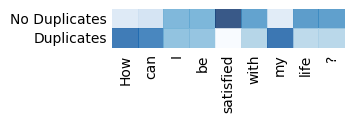

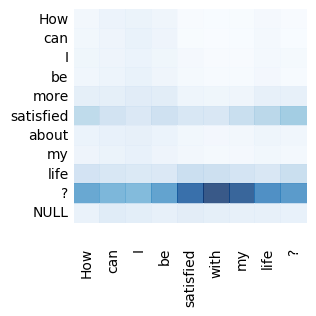

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


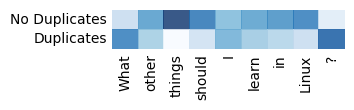

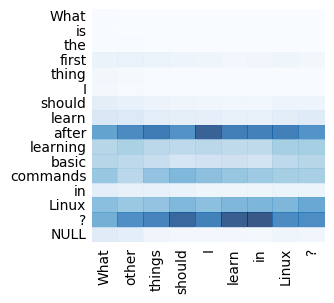

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


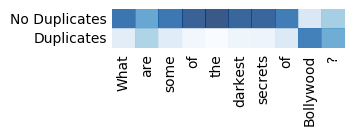

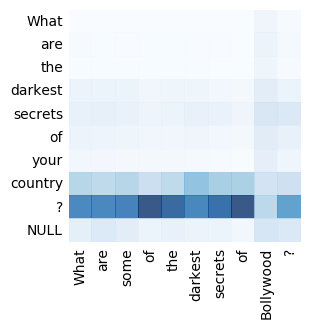

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


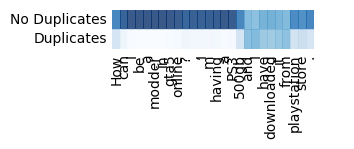

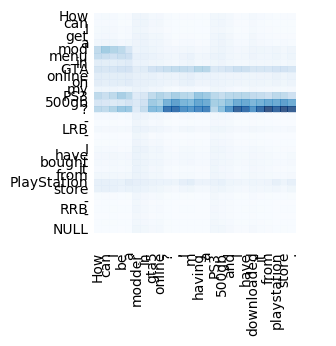

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


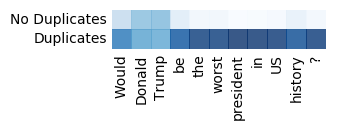

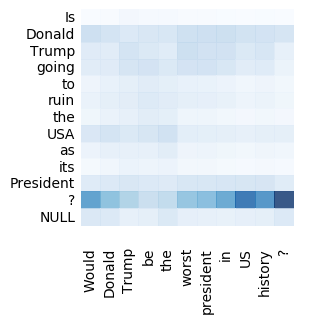

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


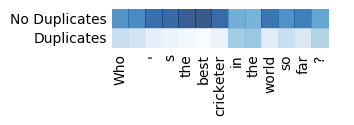

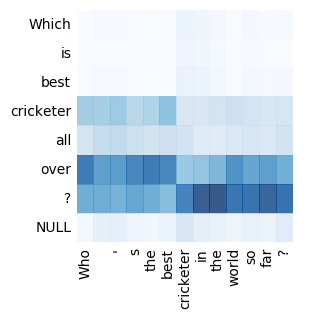

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


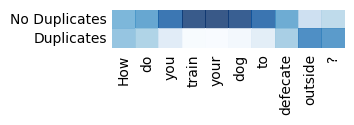

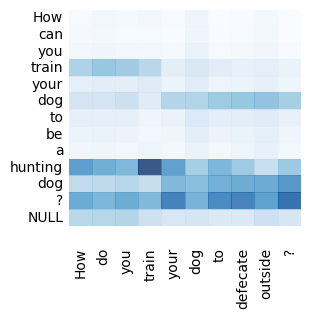

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


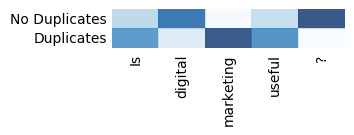

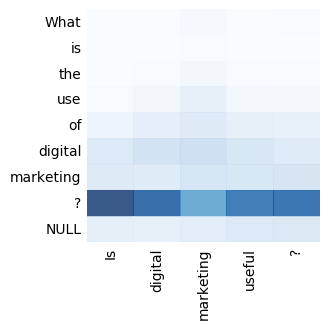

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


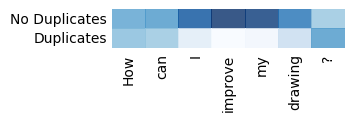

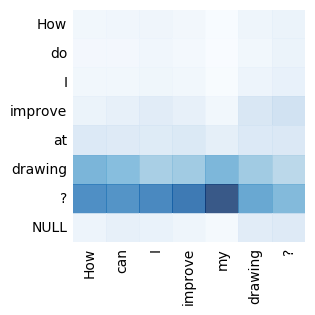

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


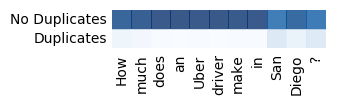

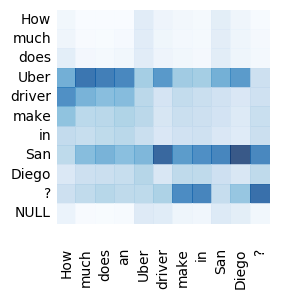

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


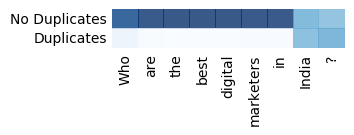

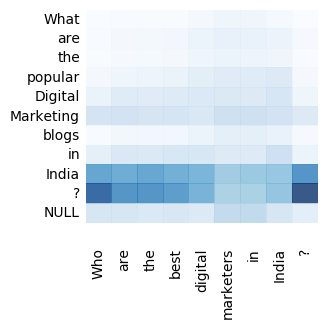

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


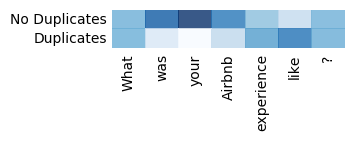

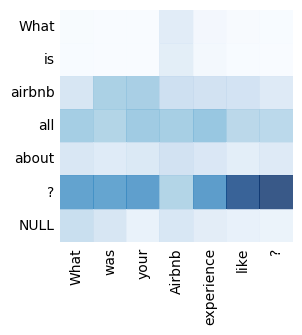

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


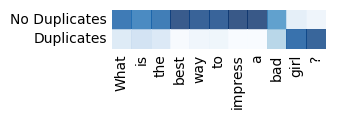

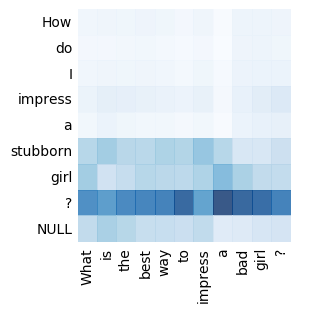

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


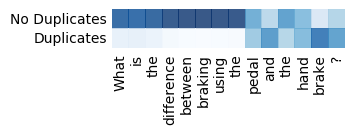

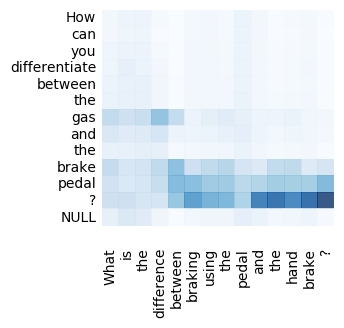

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


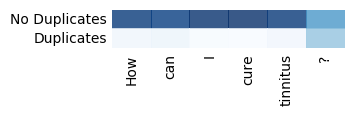

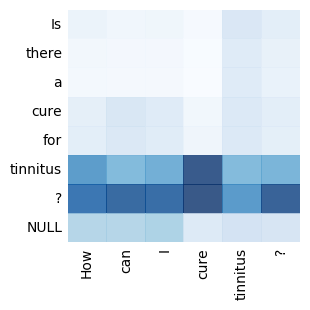

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


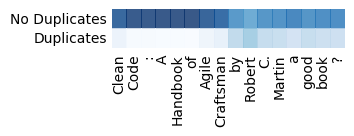

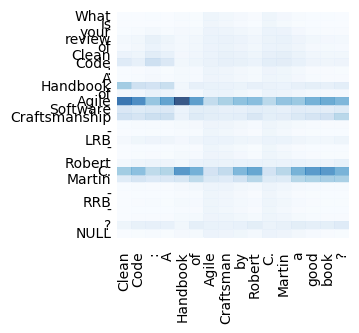

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


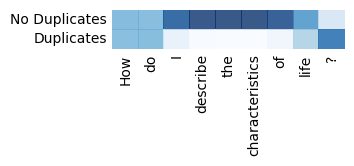

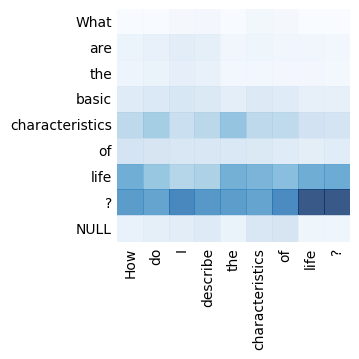

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


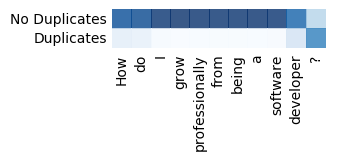

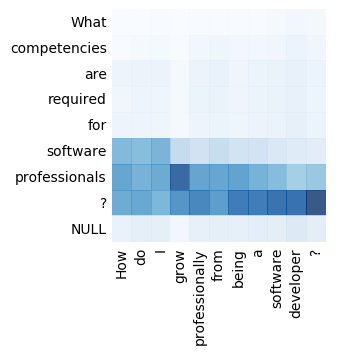

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


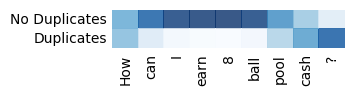

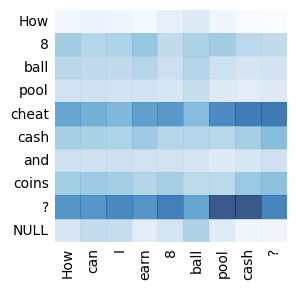

True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


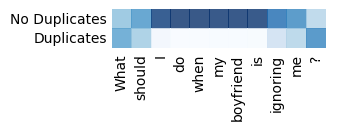

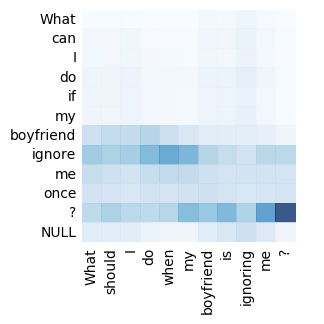

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


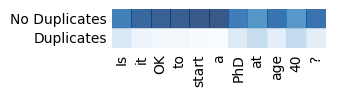

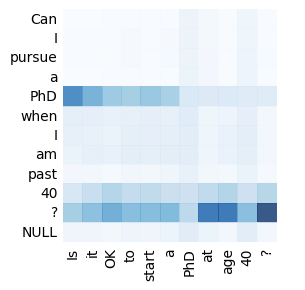

True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: No duplicates
Incorrect


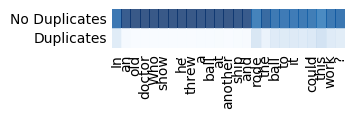

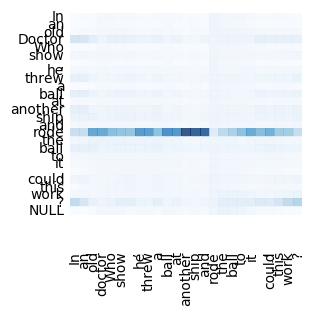

In [118]:

import matplotlib.pyplot as plt

def softmax(x):
    """
    x: [batch_size, n_class]
    Compute softmax values for each sets of scores in x.
    """
    num_class = x.shape[1]
    max_x = np.max(x, 1)
    t = np.tile(max_x, (num_class, 1)).T
    
    ex = np.exp(x-t)
    
    exp_sum = np.sum(ex, 1)
    
    e_x = np.exp(x - np.max(x))
    
    softmax = np.divide(ex, np.tile(exp_sum, (num_class, 1)).T)
    return softmax


def visualize(premise_tokens, hypothesis_tokens, attention, logits_per_timestep):    
    """
    attention: size of [len_hypo, len_premise]
    """        
        
    logits_per_timestep = softmax(logits_per_timestep.T).T
    # print(logits_per_timestep)
    
    # Plot it out
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(logits_per_timestep, cmap=plt.cm.Blues, alpha=0.8)

    # Format
    fig = plt.gcf()
    fig.set_size_inches(3, 0.5)

    # turn off the frame
    ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(logits_per_timestep.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(logits_per_timestep.shape[1]) + 0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    # ax.xaxis.tick_top()

    # Set the labels

    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(hypothesis_tokens, minor=False)
    ax.set_yticklabels(['No Duplicates', 'Duplicates'], minor=False)

    # rotate the
    plt.xticks(rotation=90)

    ax.grid(False)

    # Turn off all the ticks
    ax = plt.gca()


    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    plt.show()


    # Plot it out
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(attention.T, cmap=plt.cm.Blues, alpha=0.8)    

    # Format
    fig = plt.gcf()
    fig.set_size_inches(3, 3)

    # turn off the frame
    ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(attention.shape[1]) + 0.5, minor=False)
    ax.set_xticks(np.arange(attention.shape[0]) + 0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    # ax.xaxis.tick_top()

    # Set the labels

    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(hypothesis_tokens, minor=False)
    ax.set_yticklabels(premise_tokens, minor=False)

    # rotate the
    plt.xticks(rotation=90)

    ax.grid(False)

    # Turn off all the ticks
    ax = plt.gca()


    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    plt.show()
    

for batch_idx in range(num_batch): 
    batch_idx = 7
    for point_idx in range(batch_size):
        
        premise_tokens, hypothesis_tokens, a_kj_ph, logits, z, logits_per_h = get_datapoint(batch_data, batch_idx, point_idx)
        
        
        #print(logits)
        # print(logits_per_h[-1, :])
        if not (np.argmax(logits) == np.argmax(z)):
            print("True label [no_dup, dup]:", "No duplicates" if np.argmax(z) == 0 else "Duplicates")
            print("Pred label [no_dup, dup]:", "No duplicates" if np.argmax(logits) == 0 else "Duplicates")
            print("Correct" if np.argmax(logits) == np.argmax(z) else "Incorrect")    
            visualize(premise_tokens, hypothesis_tokens, a_kj_ph, logits_per_h.T)
    break
